In [185]:
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import seaborn as sns


In [186]:
df = pd.read_csv('framingham.csv')

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [187]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [188]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [189]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [190]:
target_column = 'TenYearCHD'
X = df.drop(target_column, axis=1)
y = df[target_column]

y = y.values.astype(np.float32)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessing_pipeline.fit(X_train)

X_train_scaled = preprocessing_pipeline.transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

print(np.isnan(X_train_scaled).sum())
print(np.isnan(X_test_scaled).sum())


(3390, 15)
(848, 15)
0
0


In [192]:
class HeartDiseaseDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.FloatTensor(features)
    self.labels = torch.FloatTensor(labels)

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [193]:
train_dataset = HeartDiseaseDataset(X_train_scaled, y_train)
test_dataset = HeartDiseaseDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [194]:
class HeartDiseaseDataset(nn.Module):
  def __init__(self, input_size):
    super(HeartDiseaseDataset, self).__init__()

    self.fc1 = nn.Linear(input_size, 128)
    self.relu1 = nn.ReLU()

    self.fc2 = nn.Linear(128, 64)
    self.relu2 = nn.ReLU()

    self.fc3 = nn.Linear(64, 32)
    self.relu3 = nn.ReLU()

    self.dropout = nn.Dropout(0.3)

    self.fc4 = nn.Linear(32, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu1(x)

    x = self.fc2(x)
    x = self.relu2(x)

    x = self.fc3(x)
    x = self.relu3(x)

    x = self.dropout(x)

    x = self.fc4(x)
    x = self.sigmoid(x)

    return x


In [195]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = X_train_scaled.shape[1]
model = HeartDiseaseDataset(input_size).to(device)

print(model)

HeartDiseaseDataset(
  (fc1): Linear(in_features=15, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [196]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(criterion)
print(optimizer)

BCELoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [197]:
num_epoch = 50
train_losses = []
train_accuracies = []


for epoch in range(num_epoch):
  model.train()

  running_loss = 0.0
  correct_predictions = 0
  total_samples = 0

  train_loop = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epoch}')

  for batch_idx, (features, labels) in enumerate(train_loop):
    features, labels = features.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = model(features)

    outputs = outputs.squeeze()

    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    running_loss += loss.item()

    predicted_labels = (outputs >= 0.5).float()
    total_samples += labels.size(0)
    correct_predictions += (predicted_labels == labels).sum().item()

    train_loop.set_postfix({
      'loss' : f"{loss.item():.4f}",
      'acc' : f"{100*correct_predictions/ total_samples: .2f}"
    })
  epoch_loss = running_loss / len(train_loader)
  epoch_accuracy = 100 * correct_predictions / total_samples

  train_losses.append(epoch_loss)
  train_accuracies.append(epoch_accuracy)
  print(f"Epoch [{epoch + 1}/{num_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")
print('Finished Training')


Epoch 1/50: 100%|██████████| 53/53 [00:00<00:00, 267.76it/s, loss=0.4339, acc=83.42]


Epoch [1/50], Loss: 0.5114, Accuracy: 83.42%


Epoch 2/50: 100%|██████████| 53/53 [00:00<00:00, 246.05it/s, loss=0.3577, acc=84.81]


Epoch [2/50], Loss: 0.3976, Accuracy: 84.81%


Epoch 3/50: 100%|██████████| 53/53 [00:00<00:00, 251.90it/s, loss=0.3786, acc=84.81]


Epoch [3/50], Loss: 0.3855, Accuracy: 84.81%


Epoch 4/50: 100%|██████████| 53/53 [00:00<00:00, 255.57it/s, loss=0.3158, acc=85.01]


Epoch [4/50], Loss: 0.3824, Accuracy: 85.01%


Epoch 5/50: 100%|██████████| 53/53 [00:00<00:00, 259.88it/s, loss=0.4883, acc=85.37]


Epoch [5/50], Loss: 0.3786, Accuracy: 85.37%


Epoch 6/50: 100%|██████████| 53/53 [00:00<00:00, 253.29it/s, loss=0.4374, acc=85.72]


Epoch [6/50], Loss: 0.3779, Accuracy: 85.72%


Epoch 7/50: 100%|██████████| 53/53 [00:00<00:00, 256.67it/s, loss=0.3922, acc=85.43]


Epoch [7/50], Loss: 0.3745, Accuracy: 85.43%


Epoch 8/50: 100%|██████████| 53/53 [00:00<00:00, 243.30it/s, loss=0.3456, acc=85.81]


Epoch [8/50], Loss: 0.3715, Accuracy: 85.81%


Epoch 9/50: 100%|██████████| 53/53 [00:00<00:00, 257.39it/s, loss=0.2493, acc=85.81]


Epoch [9/50], Loss: 0.3697, Accuracy: 85.81%


Epoch 10/50: 100%|██████████| 53/53 [00:00<00:00, 267.34it/s, loss=0.2451, acc=86.25]


Epoch [10/50], Loss: 0.3641, Accuracy: 86.25%


Epoch 11/50: 100%|██████████| 53/53 [00:00<00:00, 246.34it/s, loss=0.3977, acc=86.11]


Epoch [11/50], Loss: 0.3603, Accuracy: 86.11%


Epoch 12/50: 100%|██████████| 53/53 [00:00<00:00, 251.11it/s, loss=0.3373, acc=86.43]


Epoch [12/50], Loss: 0.3640, Accuracy: 86.43%


Epoch 13/50: 100%|██████████| 53/53 [00:00<00:00, 240.57it/s, loss=0.2885, acc=86.55]


Epoch [13/50], Loss: 0.3585, Accuracy: 86.55%


Epoch 14/50: 100%|██████████| 53/53 [00:00<00:00, 259.19it/s, loss=0.2542, acc=86.05]


Epoch [14/50], Loss: 0.3545, Accuracy: 86.05%


Epoch 15/50: 100%|██████████| 53/53 [00:00<00:00, 253.03it/s, loss=0.4028, acc=86.90]


Epoch [15/50], Loss: 0.3511, Accuracy: 86.90%


Epoch 16/50: 100%|██████████| 53/53 [00:00<00:00, 249.17it/s, loss=0.4767, acc=87.17]


Epoch [16/50], Loss: 0.3496, Accuracy: 87.17%


Epoch 17/50: 100%|██████████| 53/53 [00:00<00:00, 251.91it/s, loss=0.3543, acc=86.84]


Epoch [17/50], Loss: 0.3456, Accuracy: 86.84%


Epoch 18/50: 100%|██████████| 53/53 [00:00<00:00, 238.21it/s, loss=0.2714, acc=87.05]


Epoch [18/50], Loss: 0.3421, Accuracy: 87.05%


Epoch 19/50: 100%|██████████| 53/53 [00:00<00:00, 259.69it/s, loss=0.2528, acc=87.40]


Epoch [19/50], Loss: 0.3387, Accuracy: 87.40%


Epoch 20/50: 100%|██████████| 53/53 [00:00<00:00, 257.14it/s, loss=0.4084, acc=87.35]


Epoch [20/50], Loss: 0.3356, Accuracy: 87.35%


Epoch 21/50: 100%|██████████| 53/53 [00:00<00:00, 249.74it/s, loss=0.2918, acc=87.32]


Epoch [21/50], Loss: 0.3321, Accuracy: 87.32%


Epoch 22/50: 100%|██████████| 53/53 [00:00<00:00, 258.35it/s, loss=0.3840, acc=87.58]


Epoch [22/50], Loss: 0.3314, Accuracy: 87.58%


Epoch 23/50: 100%|██████████| 53/53 [00:00<00:00, 241.15it/s, loss=0.2464, acc=87.67]


Epoch [23/50], Loss: 0.3283, Accuracy: 87.67%


Epoch 24/50: 100%|██████████| 53/53 [00:00<00:00, 238.76it/s, loss=0.3426, acc=88.08]


Epoch [24/50], Loss: 0.3211, Accuracy: 88.08%


Epoch 25/50: 100%|██████████| 53/53 [00:00<00:00, 248.35it/s, loss=0.3683, acc=88.17]


Epoch [25/50], Loss: 0.3149, Accuracy: 88.17%


Epoch 26/50: 100%|██████████| 53/53 [00:00<00:00, 251.62it/s, loss=0.3343, acc=88.11]


Epoch [26/50], Loss: 0.3160, Accuracy: 88.11%


Epoch 27/50: 100%|██████████| 53/53 [00:00<00:00, 199.95it/s, loss=0.2798, acc=88.82]


Epoch [27/50], Loss: 0.3068, Accuracy: 88.82%


Epoch 28/50: 100%|██████████| 53/53 [00:00<00:00, 192.76it/s, loss=0.3153, acc=88.79]


Epoch [28/50], Loss: 0.3020, Accuracy: 88.79%


Epoch 29/50: 100%|██████████| 53/53 [00:00<00:00, 205.31it/s, loss=0.3932, acc=88.61]


Epoch [29/50], Loss: 0.2995, Accuracy: 88.61%


Epoch 30/50: 100%|██████████| 53/53 [00:00<00:00, 240.55it/s, loss=0.3035, acc=89.06]


Epoch [30/50], Loss: 0.2967, Accuracy: 89.06%


Epoch 31/50: 100%|██████████| 53/53 [00:00<00:00, 244.17it/s, loss=0.2704, acc=89.03]


Epoch [31/50], Loss: 0.2940, Accuracy: 89.03%


Epoch 32/50: 100%|██████████| 53/53 [00:00<00:00, 220.61it/s, loss=0.2628, acc=89.50]


Epoch [32/50], Loss: 0.2853, Accuracy: 89.50%


Epoch 33/50: 100%|██████████| 53/53 [00:00<00:00, 245.71it/s, loss=0.3090, acc=89.38]


Epoch [33/50], Loss: 0.2818, Accuracy: 89.38%


Epoch 34/50: 100%|██████████| 53/53 [00:00<00:00, 246.03it/s, loss=0.1727, acc=89.94]


Epoch [34/50], Loss: 0.2749, Accuracy: 89.94%


Epoch 35/50: 100%|██████████| 53/53 [00:00<00:00, 261.86it/s, loss=0.3412, acc=89.65]


Epoch [35/50], Loss: 0.2667, Accuracy: 89.65%


Epoch 36/50: 100%|██████████| 53/53 [00:00<00:00, 251.23it/s, loss=0.2522, acc=90.27]


Epoch [36/50], Loss: 0.2644, Accuracy: 90.27%


Epoch 37/50: 100%|██████████| 53/53 [00:00<00:00, 211.43it/s, loss=0.3067, acc=90.03]


Epoch [37/50], Loss: 0.2673, Accuracy: 90.03%


Epoch 38/50: 100%|██████████| 53/53 [00:00<00:00, 218.61it/s, loss=0.3759, acc=89.62]


Epoch [38/50], Loss: 0.2702, Accuracy: 89.62%


Epoch 39/50: 100%|██████████| 53/53 [00:00<00:00, 200.67it/s, loss=0.1816, acc=90.65]


Epoch [39/50], Loss: 0.2601, Accuracy: 90.65%


Epoch 40/50: 100%|██████████| 53/53 [00:00<00:00, 199.94it/s, loss=0.4099, acc=90.97]


Epoch [40/50], Loss: 0.2456, Accuracy: 90.97%


Epoch 41/50: 100%|██████████| 53/53 [00:00<00:00, 207.81it/s, loss=0.2806, acc=91.00]


Epoch [41/50], Loss: 0.2418, Accuracy: 91.00%


Epoch 42/50: 100%|██████████| 53/53 [00:00<00:00, 249.37it/s, loss=0.2553, acc=91.15]


Epoch [42/50], Loss: 0.2346, Accuracy: 91.15%


Epoch 43/50: 100%|██████████| 53/53 [00:00<00:00, 250.27it/s, loss=0.2565, acc=91.33]


Epoch [43/50], Loss: 0.2336, Accuracy: 91.33%


Epoch 44/50: 100%|██████████| 53/53 [00:00<00:00, 247.20it/s, loss=0.2413, acc=91.65]


Epoch [44/50], Loss: 0.2291, Accuracy: 91.65%


Epoch 45/50: 100%|██████████| 53/53 [00:00<00:00, 243.19it/s, loss=0.2040, acc=91.62]


Epoch [45/50], Loss: 0.2300, Accuracy: 91.62%


Epoch 46/50: 100%|██████████| 53/53 [00:00<00:00, 223.91it/s, loss=0.1150, acc=91.89]


Epoch [46/50], Loss: 0.2195, Accuracy: 91.89%


Epoch 47/50: 100%|██████████| 53/53 [00:00<00:00, 244.62it/s, loss=0.2375, acc=91.65]


Epoch [47/50], Loss: 0.2190, Accuracy: 91.65%


Epoch 48/50: 100%|██████████| 53/53 [00:00<00:00, 230.17it/s, loss=0.2514, acc=92.45]


Epoch [48/50], Loss: 0.2049, Accuracy: 92.45%


Epoch 49/50: 100%|██████████| 53/53 [00:00<00:00, 244.43it/s, loss=0.2921, acc=91.68]


Epoch [49/50], Loss: 0.2190, Accuracy: 91.68%


Epoch 50/50: 100%|██████████| 53/53 [00:00<00:00, 237.83it/s, loss=0.1909, acc=92.42]

Epoch [50/50], Loss: 0.2038, Accuracy: 92.42%
Finished Training


In [198]:
model.eval()

with torch.no_grad():
  test_loss = 0.0
  correct = 0
  total = 0

  all_predictions = []
  all_labels = []

  test_loop = tqdm(test_loader, desc='Testing')

  for features, labels in test_loop:
    features = features.to(device)
    labels = labels.to(device)

    outputs = model(features)
    outputs = outputs.squeeze()

    loss = criterion(outputs, labels)

    test_loss += loss.item()

    predicted = (outputs>=0.5).float()
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    all_predictions.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    test_loop.set_postfix({
        'loss' : f"{loss.item():.4f}",
        'acc' : f"{100*correct/ total: .2f}"
    })
  avg_test_loss = test_loss / len(test_loader)
  test_accuracy = 100 * correct / total
  print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Testing: 100%|██████████| 14/14 [00:00<00:00, 343.12it/s, loss=0.7301, acc=80.90]


Test Loss: 0.6514, Test Accuracy: 80.90%


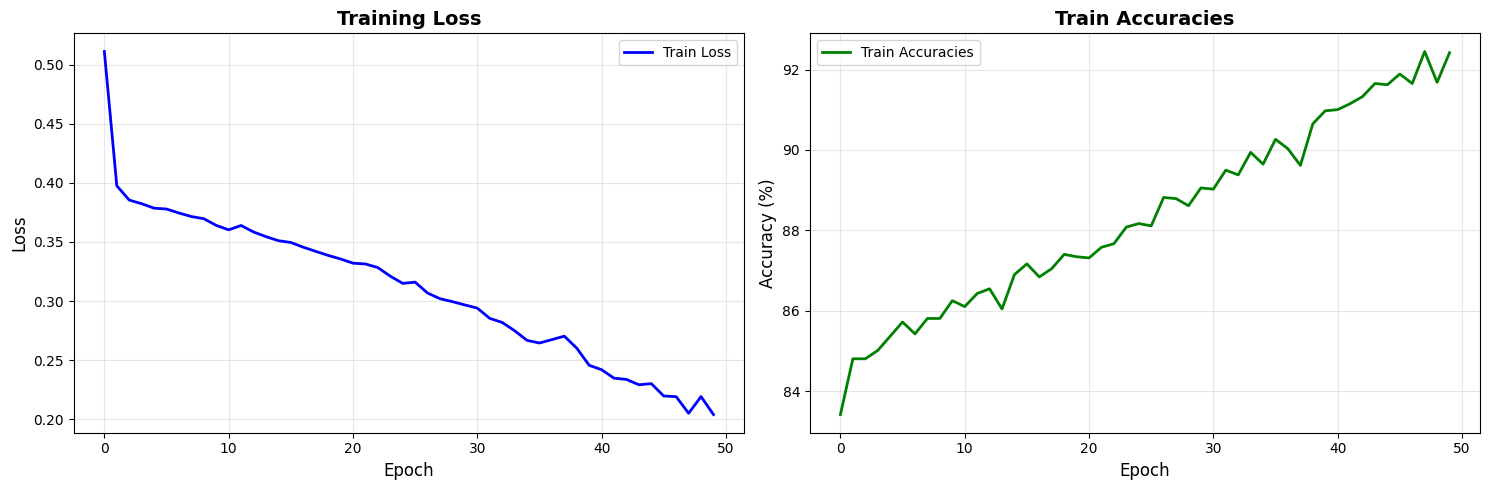

In [199]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(train_losses, label="Train Loss", color='blue', linewidth=2)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12)
ax1.set_title("Training Loss", fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(train_accuracies, label="Train Accuracies", color='green', linewidth=2)
ax2.set_xlabel("Epoch", fontsize=12)
ax2.set_ylabel("Accuracy (%)", fontsize=12)
ax2.set_title("Train Accuracies", fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

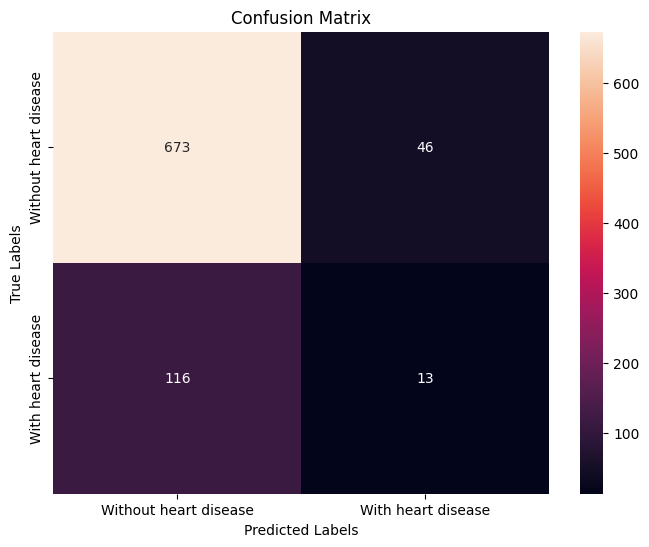

                       precision    recall  f1-score   support

Without heart disease       0.85      0.94      0.89       719
   With heart disease       0.22      0.10      0.14       129

             accuracy                           0.81       848
            macro avg       0.54      0.52      0.52       848
         weighted avg       0.76      0.81      0.78       848



In [200]:
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

confusion_matrix = sklearn.metrics.confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix,fmt='d', annot=True,
            xticklabels=['Without heart disease', 'With heart disease'],
            yticklabels=['Without heart disease', 'With heart disease']
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(sklearn.metrics.classification_report(all_labels, all_predictions,
      target_names=['Without heart disease', 'With heart disease']))


In [201]:
sample_features = {
    'male': 1,
    'age': 66,
    'education': 1,
    'currentSmoker': 1,
    'cigsPerDay': 200,
    'BPMeds': 1,
    'prevalentStroke': 1,
    'prevalentHyp': 1,
    'diabetes': 0,
    'totChol': 15,
    'sysBP': 150,
    'diaBP': 100,
    'BMI': 20,
    'heartRate': 80,
    'glucose': 10
}

sample_features_processed = preprocessing_pipeline.transform(pd.DataFrame([sample_features]))
sample_tensor_new = torch.FloatTensor(sample_features_processed).to(device)

model.eval()

with torch.no_grad():
  prediction_new = model(sample_tensor_new)
  probability_new = prediction_new.item()

print(f"Probability of having heart disease: {probability_new * 100:.2f}%")
print(f'{'With heart disease' if probability_new>=0.5 else 'Without heart disease'}')



Probability of having heart disease: 100.00%
With heart disease
